In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dafsdfa/Data set.csv


# Box Plot

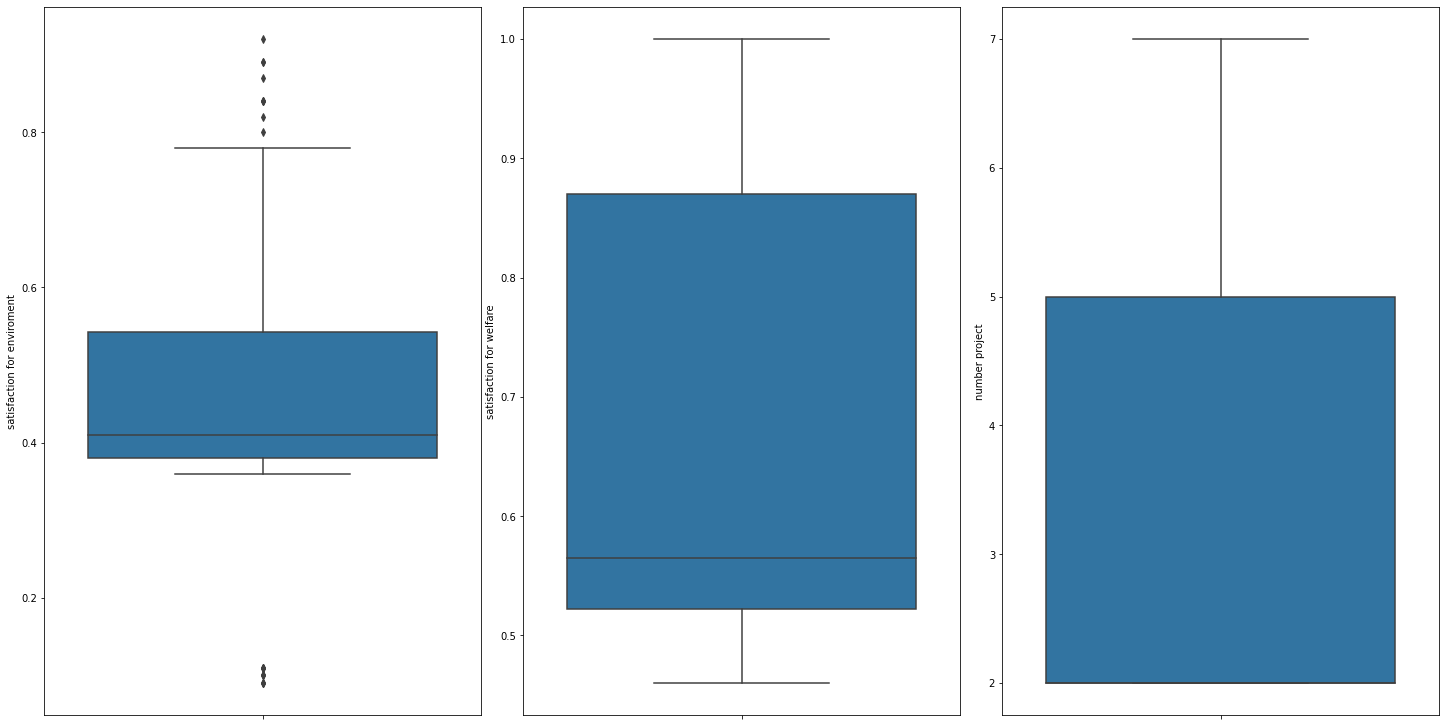

In [2]:
df2 = pd.read_csv("../input/dafsdfa/Data set.csv")
df2.head()

#delete column
df2 = df2.drop(columns = 'average montly hours')

#print
# df2

#box plot
import seaborn as sns
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 10)) #plot, sebanyak 7 kolom dan 2 baris
index = 0 
axs = axs.flatten()
for k,v in df2.items():
#     print(k)
    sns.boxplot(y=k, data=df2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Correlation Heatmap

                             satisfaction for enviroment  \
satisfaction for enviroment                     1.000000   
satisfaction for welfare                        0.254299   
number project                                 -0.154473   

                             satisfaction for welfare  number project  
satisfaction for enviroment                  0.254299       -0.154473  
satisfaction for welfare                     1.000000        0.853437  
number project                               0.853437        1.000000  


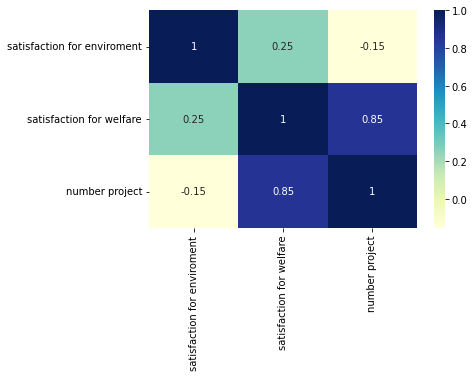

In [3]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
x = df2.drop(columns = 'number project')
y = df2['number project']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 12)

# Plotting 3D

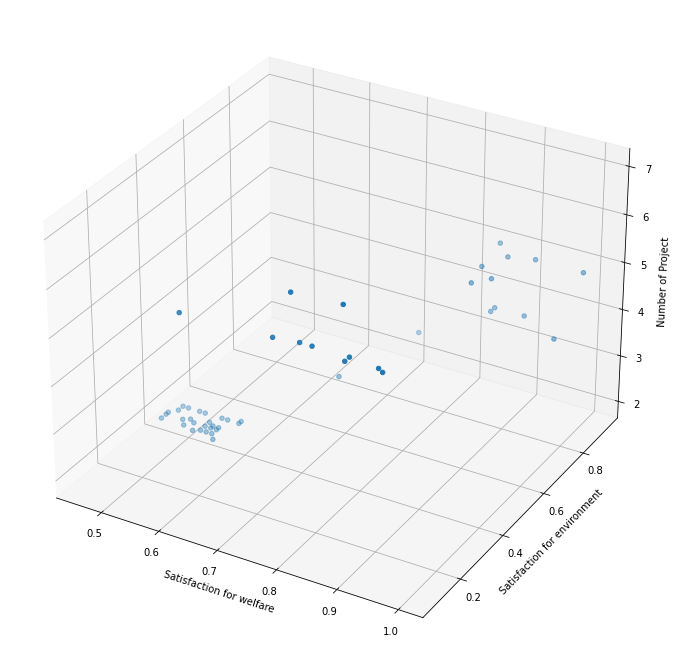

In [6]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df2["satisfaction for welfare"], df2["satisfaction for enviroment"], df2["number project"])
ax.set_xlabel('Satisfaction for welfare')
ax.set_ylabel('Satisfaction for environment')
ax.set_zlabel('Number of Project')
plt.show()

#  Linear Regression

In [7]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)
lrpredicted = lin_reg.predict(x_test)

# print('Coefficient: ', lin_reg.coef_)
# print("intercept: ", lin_reg.intercept_)
print("variance score: %f"% lin_reg.score(x_test, y_test))
print("Mean square error: %f"% mean_squared_error(y_test, lrpredicted))
print("RMSE: %f"% np.sqrt(mean_squared_error(y_test, lrpredicted)))
print("R-Squared: %f\n"% r2_score(y_test, lrpredicted))

variance score: 0.828819
Mean square error: 0.323532
RMSE: 0.568798
R-Squared: 0.828819



# Support Vector Regression

In [8]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
svrPredict = svr.predict(x_test)

# print('Coefficient: ', svr.coef_)
# print("intercept: ", svr.intercept_)
print("variance score: %f"% svr.score(x_test, y_test))
print("Mean square error: %f"% mean_squared_error(y_test, svrPredict))
print("RMSE : %f"% np.sqrt(mean_squared_error(y_test, svrPredict)))
print("R-Squared: %f\n"% r2_score(y_test, svrPredict))

variance score: 0.875769
Mean square error: 0.234797
RMSE : 0.484559
R-Squared: 0.875769



# ADA Boost Regression

In [9]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(random_state = 42)
abr.fit(x_train, y_train)
abrPredict = abr.predict(x_test)


print("variance score: %f"% abr.score(x_test, y_test))
print("Mean square error: %f"% mean_squared_error(y_test, abrPredict))
print("RMSE : %f"% np.sqrt(mean_squared_error(y_test, abrPredict)))
print("R-Squared: %f\n"% r2_score(y_test, abrPredict))

variance score: 0.958703
Mean square error: 0.078051
RMSE : 0.279376
R-Squared: 0.958703



# Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train, y_train)
rfPredict = rf.predict(x_test)

print("variance score: %f"% rf.score(x_test, y_test))
print("Mean square error: %f"% mean_squared_error(y_test, rfPredict))
print("RMSE : %f"% np.sqrt(mean_squared_error(y_test, rfPredict)))
print("R-Squared: %f\n"% r2_score(y_test, rfPredict))

variance score: 0.981878
Mean square error: 0.034250
RMSE : 0.185068
R-Squared: 0.981878

